# Predictive Insights from Portuguese Bank Marketing Data 

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import warnings

In [2]:
# Load the data
data_bank = pd.read_csv('data_bank.csv')

In [3]:
# data exploration
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,999,0,other,0
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,999,0,other,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,999,0,other,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,999,0,other,0
4,33,other,single,other,no,1,no,no,other,5,may,198,1,999,0,other,0


In [4]:
data_bank.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,857.565283,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,303.245691,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,999.000000,275.000000,1.000000


In [5]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
print(data_bank['target'].dtype)

int64


In [7]:
data_bank['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

 ### Input variables:
 
#### Bank client data:
 1. age (numeric)
 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 4. education (categorical: "unknown","secondary","primary","tertiary")
 5. default: has credit in default? (binary: "yes","no")
 6. balance: average yearly balance, in euros (numeric) 
 7. housing: has housing loan? (binary: "yes","no")
 8. loan: has personal loan? (binary: "yes","no")
 
#### Related with the last contact of the current campaign:
 9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
 10. day: last contact day of the month (numeric)
 11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 12. duration: last contact duration, in seconds (numeric)
 
#### Other attributes:
 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)
 15. previous: number of contacts performed before this campaign and for this client (numeric)
 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
 17. target (y) - has the client subscribed a term deposit? (binary: "yes","no")

### Univariate Analysis:

Bar plots for categorical variables to understand their distributions.

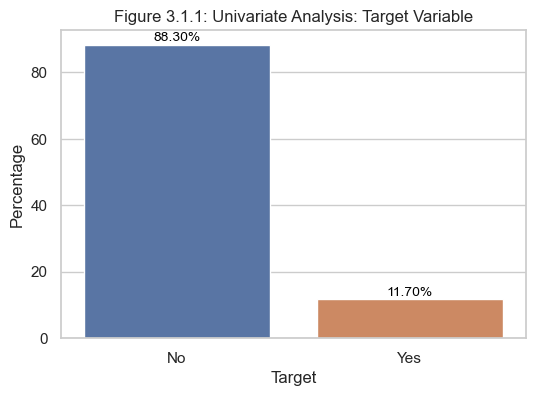

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# style for the plots
sns.set(style="whitegrid")

# percentage of subscribers ('yes') in the 'target' variable
target_percentages = data_bank['target'].value_counts(normalize=True) * 100

# bar plot for the 'target' variable with percentage labels
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=target_percentages.index, y=target_percentages.values)
plt.title("Figure 3.1.1: Univariate Analysis: Target Variable")
plt.xlabel("Target")
plt.ylabel("Percentage")
plt.xticks([0, 1], ['No', 'Yes'])  
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.savefig('target_univariate_percentage.png', bbox_inches='tight')  
plt.show()

Figure 3.1: The univariate analysis of the target variable reveals a substantial class imbalance. The majority of instances have a 'no' value, accounting for 88.30% of the dataset, while the 'yes' value represents only 11.7%. This disparity suggests that the dataset is skewed towards negative outcomes in the campaign response, which could potentially impact the performance of predictive models built on this data.

## group_df for MOE

In [9]:
group_df = data_bank[['job','target']].groupby('job', as_index=False).mean()

In [10]:
pd.merge(left=group_df.set_index('job'), right=data_bank.groupby('job')['target'].count().rename('n'), left_index=True, right_index=True)

,target,n
job,,
admin.,0.122027,5171
blue-collar,0.072750,9732
entrepreneur,0.082717,1487
housemaid,0.087903,1240
management,0.137556,9458
other,0.118056,288
retired,0.227915,2264
self-employed,0.118429,1579
services,0.088830,4154


In [11]:
data_bank.groupby('job')['target'].count().rename('n')

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
other             288
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
Name: n, dtype: int64

## Define a function `calc_moe` that takes one argument `col`:

In [12]:
def calc_moe(col):
    group_df = pd.DataFrame(data_bank.groupby(col)['target'].mean().reset_index())
    #calculate n
    group_df = group_df.set_index(col).merge(data_bank.groupby(col)['target'].count().rename('n'), left_index=True, right_index=True)
    #calc moe: MOE = 1.96 * sqrt(p * (1 - p) / n), where p is the subscription rate and n is the number of observations.
    group_df['moe'] = 1.96*np.sqrt(group_df['target']*(1-group_df['target'])/group_df['n'])
    return group_df.reset_index().sort_values('target', ascending=False)

calc_moe('job')

,job,target,n,moe
9,student,0.286780,938,0.028943
6,retired,0.227915,2264,0.017280
11,unemployed,0.155027,1303,0.019652
4,management,0.137556,9458,0.006942
0,admin.,0.122027,5171,0.008921
7,self-employed,0.118429,1579,0.015938
5,other,0.118056,288,0.037267
10,technician,0.110570,7597,0.007052
8,services,0.088830,4154,0.008652
3,housemaid,0.087903,1240,0.015760


## Define a function called `plot_w_errorbars` that takes two arguments:  `df` and `col`

Figure 3.2: The distribution of subscription percentages across different job categories offers intriguing insights. Notably, students and retirees demonstrate the highest subscription rates, standing at 28.68% and 22.79% respectively. Among other categories, management shows a significant subscription rate of 13.76%, followed by entrepreneurs at 8.27%, and blue-collar workers at 7.27%. These variations in subscription rates provide valuable clues about the relationship between occupation and campaign success.

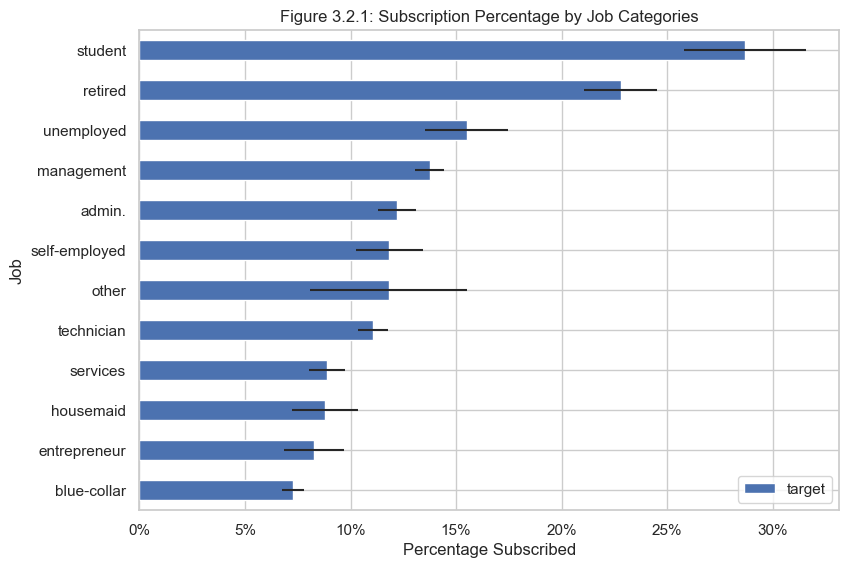

In [13]:
# Function to plot with error bars
def plot_w_errorbars(df, col, title, xlabel, ylabel):
    ax = df[[col, 'target']].set_index(col).sort_values('target', ascending=True).plot.barh(xerr=df['moe'].values[::-1])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))  # Format the x-axis ticks as percentages without decimals
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gcf().set_size_inches(10, 6)
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
    plt.savefig('subscription_by_{}.png'.format(col), dpi=300)
    plt.show()

# Call the function to plot
plot_w_errorbars(calc_moe('job'), 'job', 'Figure 3.2.1: Subscription Percentage by Job Categories', 'Percentage Subscribed', 'Job')

## fig 3.3: education vs target

In [14]:
calc_moe('education')

,education,target,n,moe
3,tertiary,0.150064,13301,0.006069
0,other,0.135703,1857,0.015577
2,secondary,0.105594,23202,0.003954
1,primary,0.086265,6851,0.006648


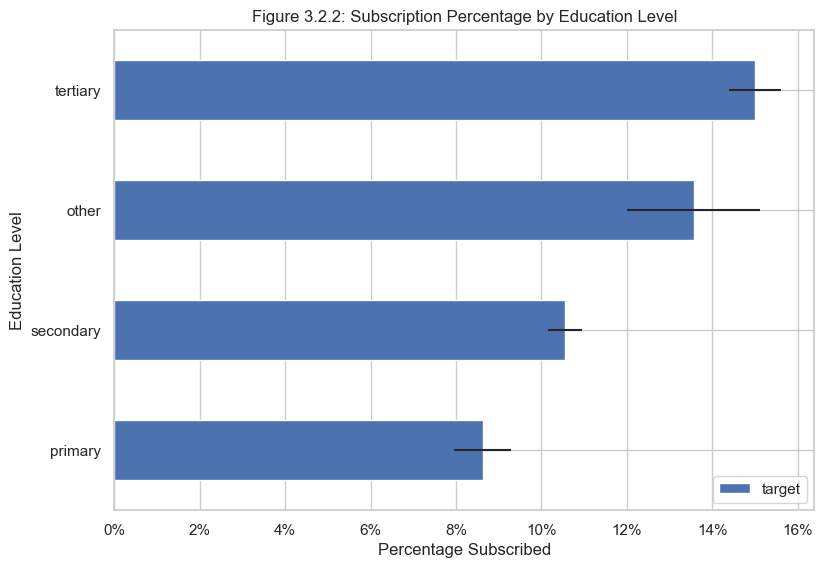

In [15]:
plot_w_errorbars(calc_moe('education'), 'education', 'Figure 3.2.2: Subscription Percentage by Education Level', 'Percentage Subscribed', 'Education Level')

Figure 3.3: The bar chart depicting the subscription percentage by education level provides valuable insights into the relationship between education and the campaign's outcome. From the visualization, we observe the following patterns: tertiary education, which encompasses advanced degrees from universities and colleges, shows the highest subscription rate of 15.01%, followed by other education at 13.57%, secondary education at 10.56%, and primary education at 8.63%. This suggests that clients with tertiary education tend to show a higher subscription rate in comparison to other education levels.

## fig 3.4: marital status vs target

In [16]:
calc_moe('marital')

,marital,target,n,moe
2,single,0.149492,12790,0.006180
0,divorced,0.119455,5207,0.008809
1,married,0.101235,27214,0.003584


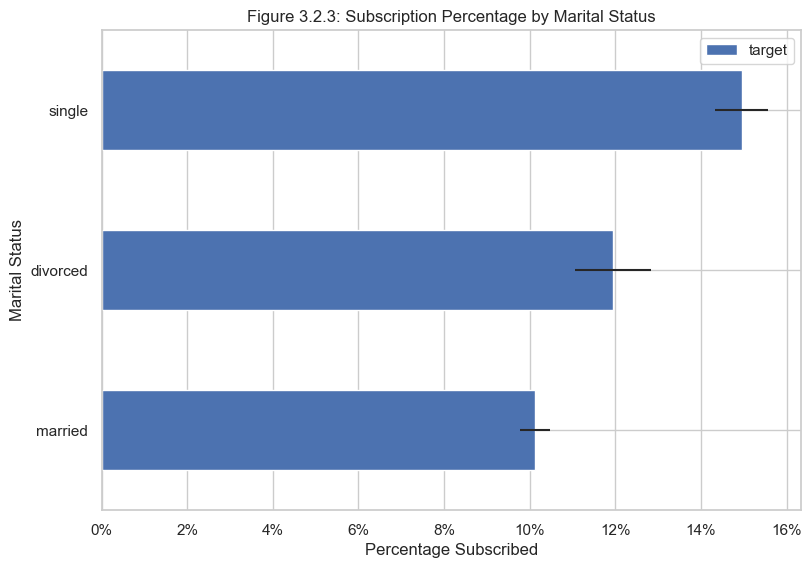

In [17]:
plot_w_errorbars(calc_moe('marital'), 'marital','Figure 3.2.3: Subscription Percentage by Marital Status', 
                 'Percentage Subscribed', 'Marital Status')

Figure 3.4 shows the  subscription percentage by marital status: Single individuals exhibit the highest subscription rate at 14.95%, followed by divorced individuals with a rate of 11.95%, while married individuals have a subscription rate of 10.12%.

## fig 3.5: housing vs target

In [18]:
calc_moe('housing')

,housing,target,n,moe
0,no,0.167024,20081,0.005159
1,yes,0.077000,25130,0.003296


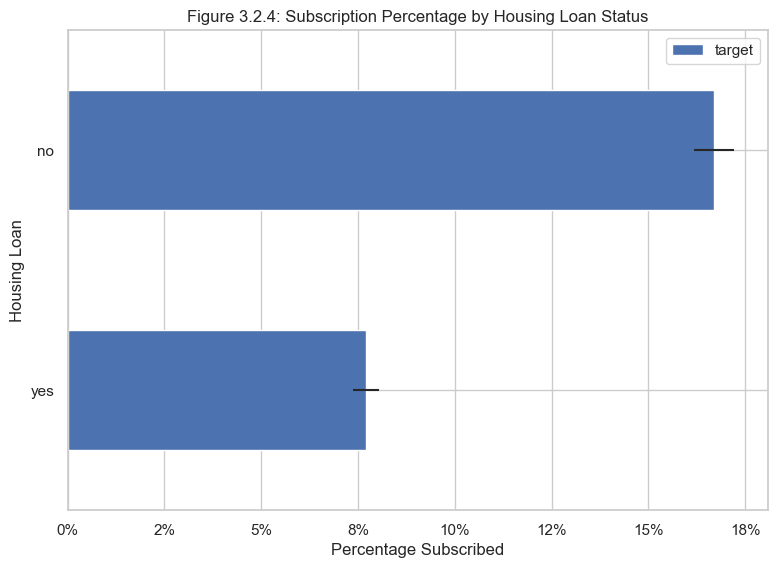

In [19]:
plot_w_errorbars(calc_moe('housing'), 'housing', 'Figure 3.2.4: Subscription Percentage by Housing Loan Status',
                'Percentage Subscribed', 'Housing Loan')

Figure 3.5: The analysis of subscription percentages with respect to housing and loan variables reveals interesting insights. Among those who do not own a house, a substantial 16.70% have subscribed to the bank's campaign, indicating a potentially higher engagement level compared to homeowners, where the subscription rate is notably lower at 7.7%. 

## fig 3.6: loan vs target

In [20]:
calc_moe('loan')

,loan,target,n,moe
0,no,0.126557,37967,0.003344
1,yes,0.066814,7244,0.005750


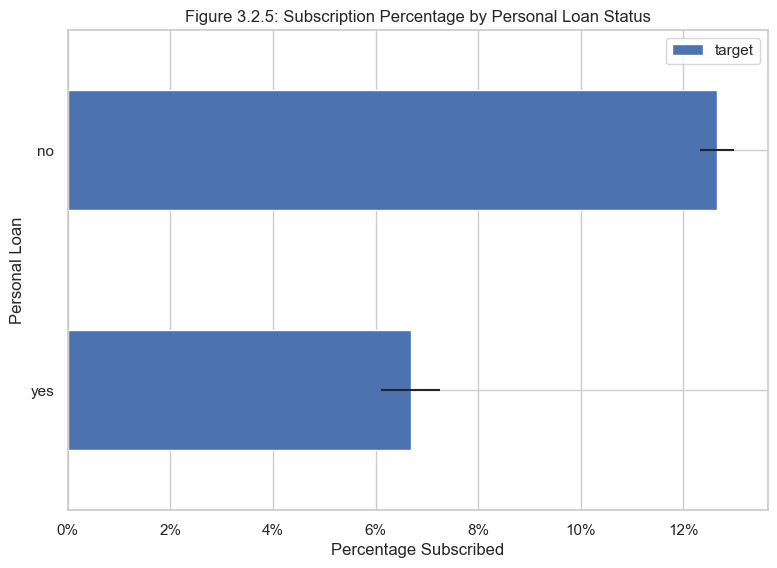

In [21]:
plot_w_errorbars(calc_moe('loan'), 'loan', 'Figure 3.2.5: Subscription Percentage by Personal Loan Status',
                 'Percentage Subscribed', 'Personal Loan')

Figure 3.6: Similarly, the relationship between loan status and subscription is pronounced. A noteworthy 12.66% of individuals without an existing loan have subscribed to the campaign, showcasing a higher inclination towards engagement. On the contrary, only 6.68% of those with a loan opted for subscription, suggesting a lower response rate among loan holders. These observations underscore the potential influence of housing and loan status on campaign subscription, emphasizing the need for further exploration and tailored marketing strategies for different customer segments.

## fig 3.7: age vs target

In [22]:
# converting 'age' variable to categorical
data_bank['age_category'] = pd.cut(data_bank['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# updated df
print(data_bank[['age', 'age_category']].head())

   age age_category
0   58        56-65
1   44        36-45
2   33        26-35
3   47        46-55
4   33        26-35


In [23]:
calc_moe('age_category')

,age_category,target,n,moe
5,66+,0.426099,751,0.035368
0,18-25,0.239521,1336,0.022886
4,56-65,0.141239,4149,0.010597
1,26-35,0.120031,15571,0.005105
2,36-45,0.093894,13856,0.004857
3,46-55,0.093527,9548,0.005840


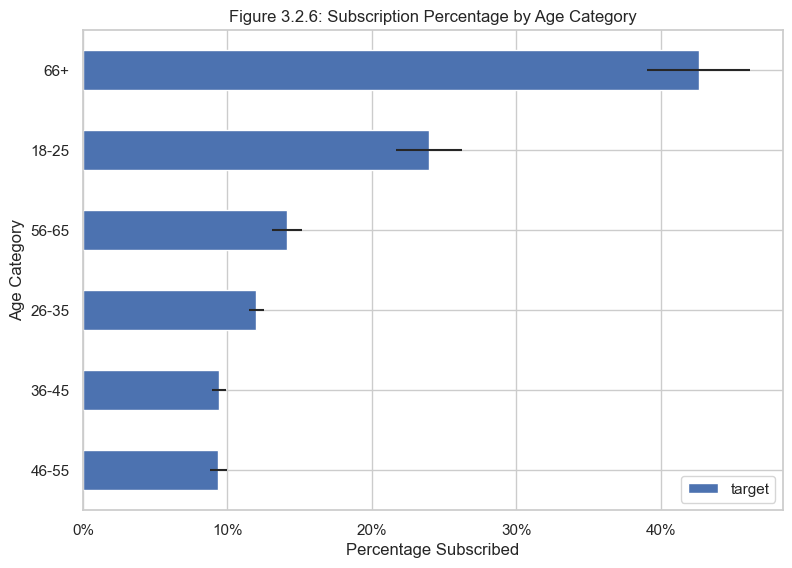

In [24]:
plot_w_errorbars(calc_moe('age_category'), 'age_category', 'Figure 3.2.6: Subscription Percentage by Age Category',
                'Percentage Subscribed', 'Age Category')


Figure 3.7: The bar chart depicting the subscription percentages across different age categories provides valuable insights into the relationship between age and campaign outcome. Notably, clients in the age bucket of 66 and above show the highest subscription rate of 42.61%, followed closely by the 18-25 age category at 23.95%. Conversely, the lowest subscription rates are observed in the age buckets of 36-45 and 46-55, with percentages of 9.39% and 9.35% respectively. This observation aligns with our earlier findings, where students, individuals with higher education levels, and retirees exhibited higher subscription rates.

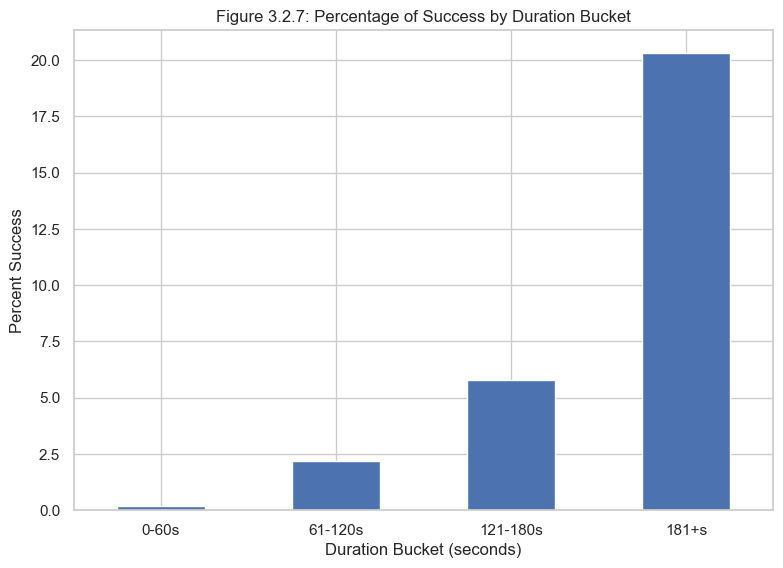

In [25]:
# duration buckets in seconds
data_bank['duration_bucket'] = pd.cut(data_bank['duration'], bins=[0, 60, 120, 180, float('inf')], labels=['0-60s', '61-120s', '121-180s', '181+s'])

# percentage of success for each duration bucket
duration_success = data_bank.groupby('duration_bucket')['target'].mean() * 100

# bar chart
fig, ax = plt.subplots()
duration_success.plot(kind='bar', ax=ax)

# labels and title
ax.set_xlabel('Duration Bucket (seconds)')
ax.set_ylabel('Percent Success')
ax.set_title('Figure 3.2.7: Percentage of Success by Duration Bucket')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.gcf().set_size_inches(10, 6)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

# Save the plot 
plt.savefig('duration_vs_success_bucket.png', dpi=300)

plt.show()

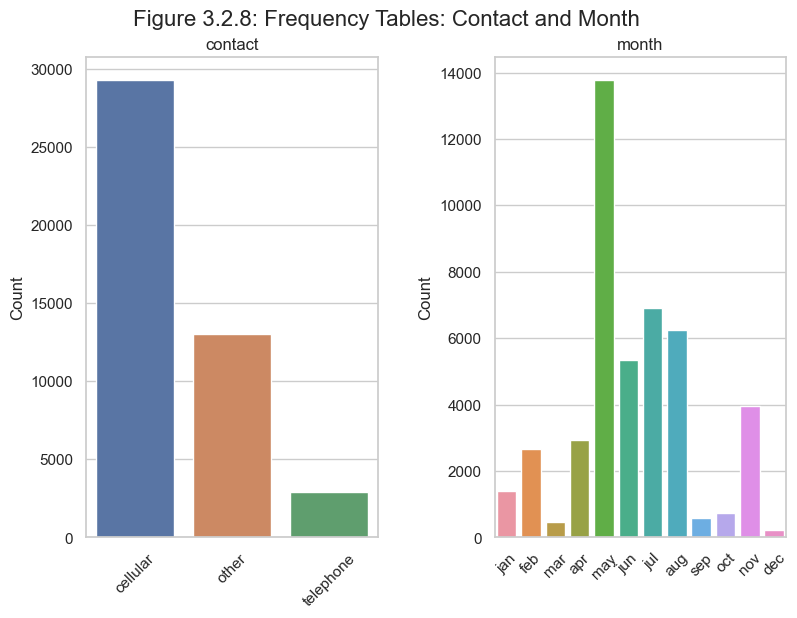

In [26]:
# fig with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# categorical columns
categorical_columns = ['contact', 'month']

# frequency tables for categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    
    if column == 'contact':
        order = data_bank[column].value_counts().index  
    elif column == 'month':
        order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']  
    else:
        order = None
    
    sns.countplot(data=data_bank, x=column, ax=ax, order=order)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Plot
plt.suptitle('Figure 3.2.8: Frequency Tables: Contact and Month', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.gcf().set_size_inches(10, 6)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

# Save the plot 
plt.savefig('frequency_tables.png', bbox_inches='tight', dpi=300)

plt.show()

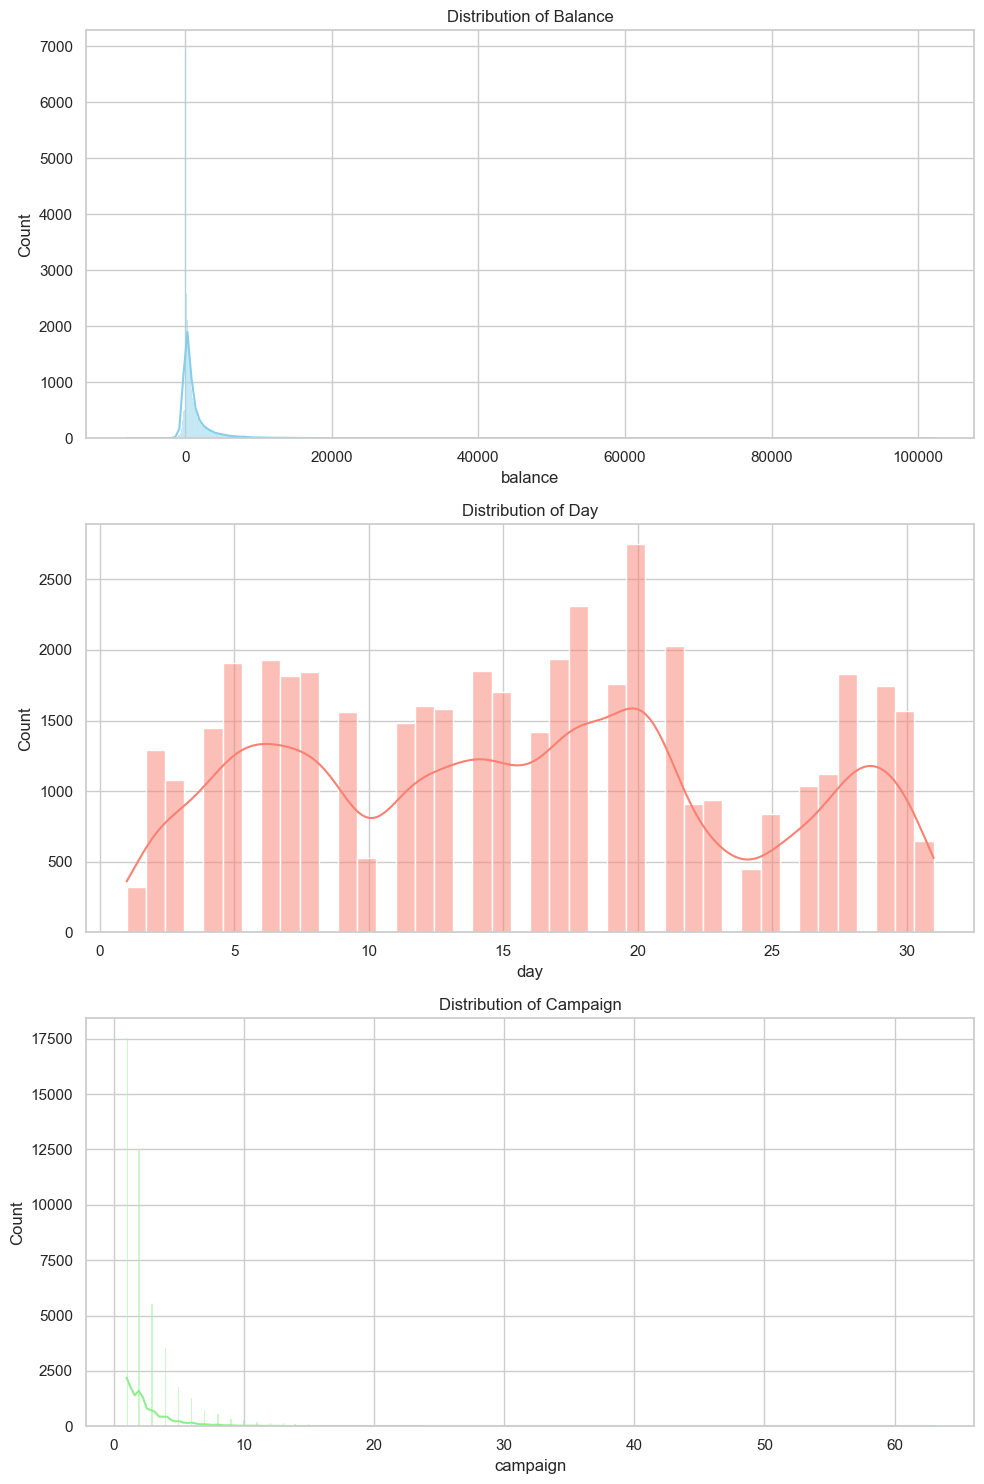

In [27]:
# style for the plots
sns.set(style="whitegrid")

# subplots 
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# numeric variables
sns.histplot(data_bank['balance'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Balance')

sns.histplot(data_bank['day'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Day')

sns.histplot(data_bank['campaign'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Campaign')

# plots
plt.tight_layout()
plt.show()

# Correlation matrix

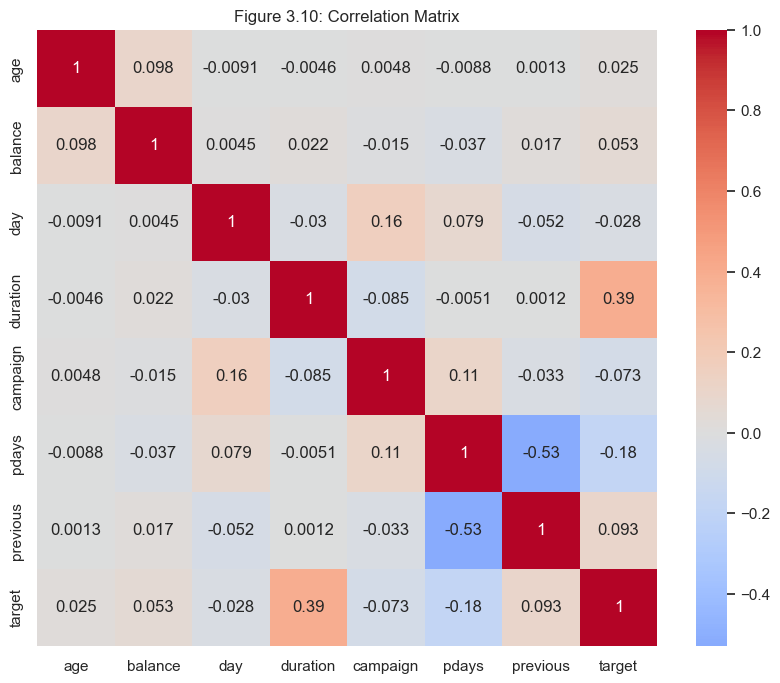

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
corr_matrix = data_bank.corr()

# matplotlib figure
plt.figure(figsize=(10, 8))

# heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Title
plt.title("Figure 3.10: Correlation Matrix")

# Save the plot
plt.savefig("correlation_matrix.png")

plt.show()

In [30]:
import pandas as pd

crosstab = pd.crosstab(data_bank['job'], data_bank['age_category'])
print(crosstab)

age_category   18-25  26-35  36-45  46-55  56-65  66+
job                                                  
admin.           158   1988   1631   1056    329    9
blue-collar      265   3277   3387   2223    574    6
entrepreneur      14    385    551    402    131    4
housemaid          7    212    353    395    245   28
management       109   3526   3021   1994    772   36
other              2     43     71    101     60   11
retired            2     10     67    363   1187  635
self-employed     25    556    524    349    117    8
services         161   1617   1335    844    196    1
student          410    478     47      3      0    0
technician       157   3059   2439   1522    408   12
unemployed        26    420    430    296    130    1


# Statistical tests: 

### T-test

In [ ]:
from scipy.stats import ttest_ind

continuous_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
significance_level = 0.05  

t_test_results = []

for column in continuous_columns:
    subscribed = data_bank[data_bank['target'] == 1][column]
    not_subscribed = data_bank[data_bank['target'] == 0][column]
    
    t_statistic, p_value = ttest_ind(subscribed, not_subscribed)
    
    if p_value < significance_level:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    
    p_value_readable = format(p_value, '.2f')  
    t_statisticreadable = format(t_statistic, '.2f')  
    
    t_test_results.append((column, t_statisticreadable, p_value_readable, significance))

t_test_df = pd.DataFrame(t_test_results, columns=['Variable', 'T-Statistic', 'P-Value', 'Significance'])

# save the results
t_test_df.to_csv('t_test_results.csv', index=False)

print(t_test_df)

### Chi-squared Test

In [ ]:
import scipy.stats as stats

# categorical variables list:
categorical_vars = ['age_category', 'job', 'marital', 'education', 'housing', 'poutcome', 
                    'contact','default', 'balance', 'loan', 'month']

# empty list 
results_list = []

# loop through categorical variables
for var in categorical_vars:
    contingency_table = pd.crosstab(data_bank[var], data_bank['target'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # compare p-value with significance level (alpha)
    alpha = 0.05
    significant = p < alpha
    
    results_list.append({'Variable': var, 'Chi-Square': round(chi2, 2), 'P-Value': round(p, 2), 'Significant': significant})

# list of results to df
results = pd.DataFrame(results_list)

# save the results
results.to_csv('chi_squared_results.csv', index=False)

print(results)